## Telecom Churn Prediction
- EDA, Data Cleaning, Visualisations
- Feature Engineering
- ML Model Training
- Hyperparameter Training

In [41]:
from unit_tests import *

df       customerID  gender  SeniorCitizen US State  Duration  Phone Code  \
1623  6035-RIIOM  Female              0       ME       130         408   

     Telephone Number Product: International Product: Voice mail  vmail  \
1623         387-6031                     no                  no      0   

      Call day minutes  total day calls  Total, EUR  eve minutes  eve calls  \
1623             176.3              140       29.97        201.0        104   

      eve EUR  night minutes  night calls  night EUR  international minutes  \
1623    17.09          161.9          123       7.29                   11.3   

      international calls  internatonal EUR  service calls PaperlessBilling  \
1623                    5              3.05              1              Yes   

      churn  
1623  False  


In [42]:
from utilties import *
from get_pred import *

In [43]:
sns.set()
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import warnings
warnings.filterwarnings("ignore")

pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)
pd.set_option('display.width', None)

In [44]:
import session_info
session_info.show()

## Get Data

In [4]:
df = pd.read_excel('data/Data_Science_Task.xlsx', sheet_name='Churn Dataset')
df.shape

(3333, 25)

In [5]:
X = df.drop(columns='churn')
y = df.loc[:, 'churn']
X_data, X_val, y_data, y_val = train_test_split(X, y, test_size=0.1,random_state=40, shuffle=True)   # seperate val data set
df_val = X_val
df_val['churn']=y_val
df_data = X_data
df_data['churn'] = y_data
df_val.to_pickle('data/df_validation.pkl')
df_data.to_pickle('data/df_data.pkl')

In [37]:
df_val.loc[df_val.customerID == '6035-RIIOM'].shape

True

## Seperate Validation Data (10 per of OrignalData)

In [7]:
print(df_val.shape)
print(df_data.shape)

(334, 25)
(2999, 25)


In [8]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2999 entries, 85 to 2267
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   customerID              2999 non-null   object 
 1   gender                  2999 non-null   object 
 2   SeniorCitizen           2999 non-null   int64  
 3   US State                2999 non-null   object 
 4   Duration                2999 non-null   int64  
 5   Phone Code              2999 non-null   int64  
 6   Telephone Number        2999 non-null   object 
 7   Product: International  2999 non-null   object 
 8   Product: Voice mail     2999 non-null   object 
 9   vmail                   2999 non-null   int64  
 10  Call day minutes        2999 non-null   float64
 11  total day calls         2999 non-null   int64  
 12  Total, EUR              2999 non-null   float64
 13  eve minutes             2999 non-null   float64
 14  eve calls               2999 non-null  

## Get Summary of DF

In [9]:
Get_Summary_DF(df_data)

,column,values,values_count_incna,values_count_nona,num_miss,pct_miss
0,customerID,"[4445-ZJNMU, 5168-MSWXT, 6366-ZGQGL, 2080-SRCD...",2999,2999,0,0.0
0,gender,"[Male, Female]",2,2,0,0.0
0,SeniorCitizen,"[0, 1]",2,2,0,0.0
0,US State,"[VT, GA, AL, AK, UT, ME, CT, CO, AZ, KS, AR, N...",51,51,0,0.0
0,Duration,"[128, 75, 49, 48, 195, 35, 90, 85, 116, 82, 34...",211,211,0,0.0
0,Phone Code,"[510, 415, 408]",3,3,0,0.0
0,Telephone Number,"[388-6441, 333-7637, 331-6229, 389-7073, 355-3...",2977,2977,0,0.0
0,Product: International,"[no, yes]",2,2,0,0.0
0,Product: Voice mail,"[yes, no]",2,2,0,0.0
0,vmail,"[29, 0, 28, 37, 41, 45, 12, 27, 36, 44, 25, 17...",46,46,0,0.0


In [10]:
cat_feats = ['gender', 'SeniorCitizen', 'Product: International', 'Product: Voice mail','Phone Code',
             'PaperlessBilling','service calls','churn']
num_feats = list(set(df_data.columns)-set(['customerID','Telephone Number', 'US State']+cat_feats))

## Numeric & Categorical Feats
- 'gender',  'SeniorCitizen', 'Product: International', 'Product: Voice mail','Phone Code','PaperlessBilling','service calls', 'churn'
- 'vmail', 'Total, EUR', 'night calls', 'Duration', 'night minutes', 'internatonal EUR', 'international minutes', 'eve minutes', 'Call day minutes', 'eve calls', 'eve EUR', 'night EUR', 'total day calls', 'international calls'

## Other Potential Feats (if possible to get)

- Age, Martial_Status,Dependents, 
- ContractInfo, CreditHistory, PreviousPackages,PaymentMethod,  BillAmount, InternetPackage, 
- CustomerSurvey, OnlineSecurity 
- Past History of Each User(Last X Months feats could be generated .eg: num_calls, calls_time, internet_usage, complains etc)

## Check Churn Feature

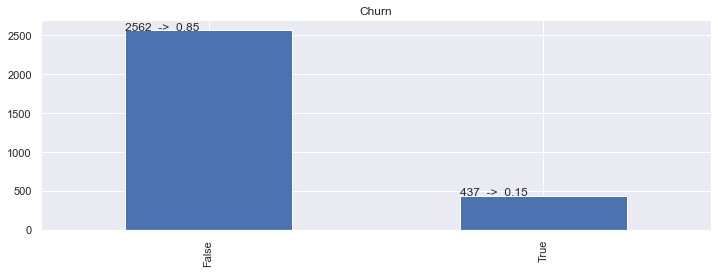

In [11]:
fig, (axes) = plt.subplots(2,1, figsize=(12,10))
fig.subplots_adjust(wspace=0.2, hspace=0.6)
Plot_Bar_Mit_Num_Per(df_data, 'churn', axes[0], 'Churn')
fig.delaxes(axes[1])

## Numeric Feats Correlation

<AxesSubplot:>

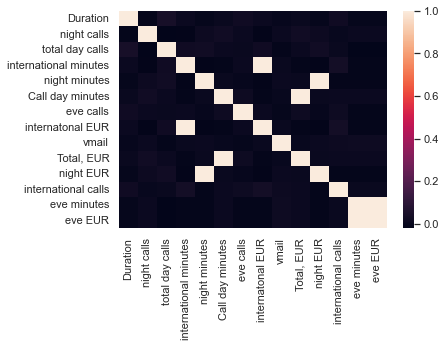

In [12]:
sns.heatmap(df[num_feats].corr())

**Directly Dependent Feats** 
- 'Total EUR'  -> 'Call day minutes'
- 'eve EUR' -> 'eve minutes'
- 'night EUR' -> 'night_minutes'
- 'internatonal EUR' -> 'international_minutes' 

let's drop them:

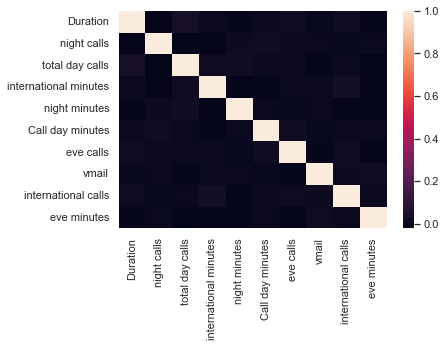

In [13]:
num_feats = list(set(num_feats)-set(['Total, EUR', 'eve EUR', 'night EUR', 'internatonal EUR']))
corr_matrix = df[num_feats].corr()
sns.heatmap(corr_matrix);

## Box Plot to See Numeric Feats Distribution wrt Churn Feats

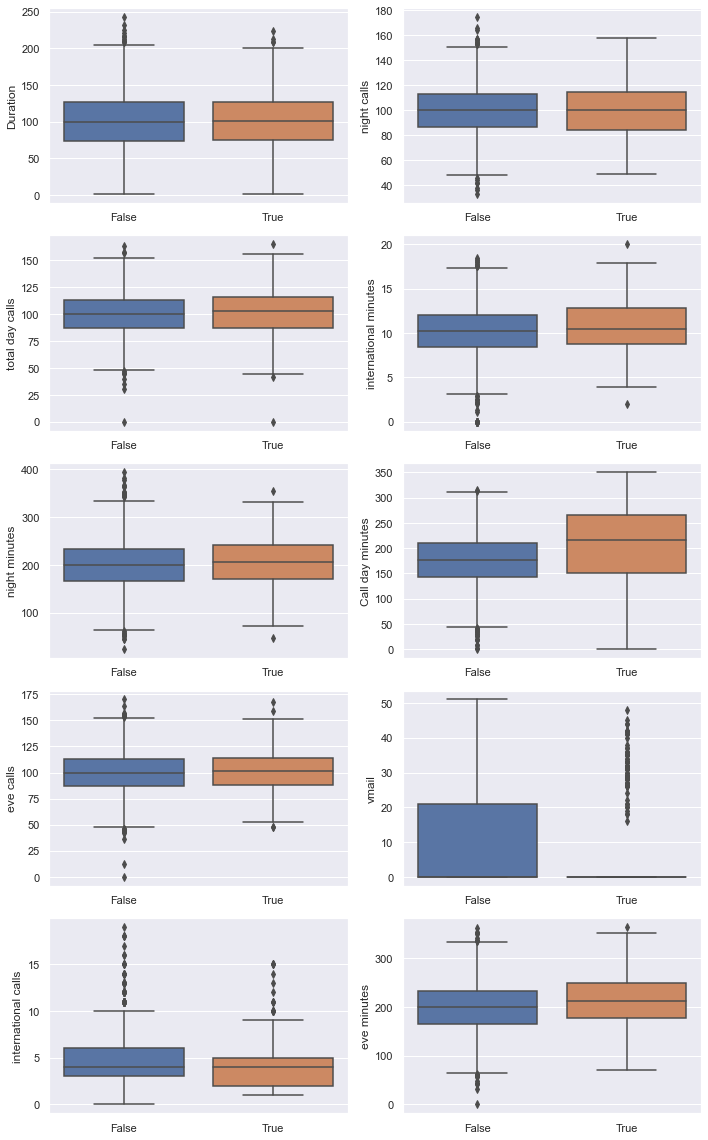

In [14]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(10,16))
for idx, feat in enumerate(num_feats):
    ax = axes[int(idx / 2), idx % 2]
    sns.boxplot(x='churn', y = feat, data=df_data, ax=ax)
    ax.set_xlabel('')
    ax.set_ylabel(feat)
fig.tight_layout();

- Call day minutes and vmail shows interesting trend

## Distribution trend for individual Numeric Feats

In [15]:
@interact( feature = list(num_feats))
def Inter_Plot_Num_Churn(feature):
    Numeric_Distribution_Plot(df_data, feature,'churn' )

interactive(children=(Dropdown(description='feature', options=('Duration', 'night calls', 'total day calls', '…

## Categorical Features wrt Churn Feat

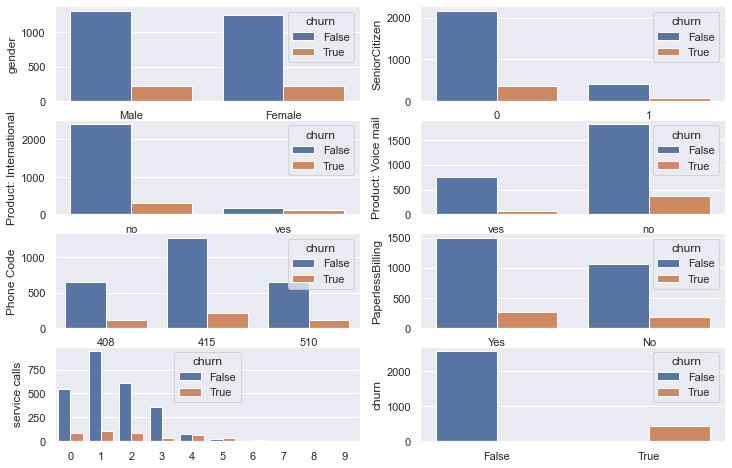

In [16]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12,8))
for idx, feat in enumerate(cat_feats):
    ax = axes[int(idx / 2), idx % 2]
    sns.countplot(x=feat, hue = 'churn', data=df_data, ax=ax)
    ax.set_xlabel('')
    ax.set_ylabel(feat)

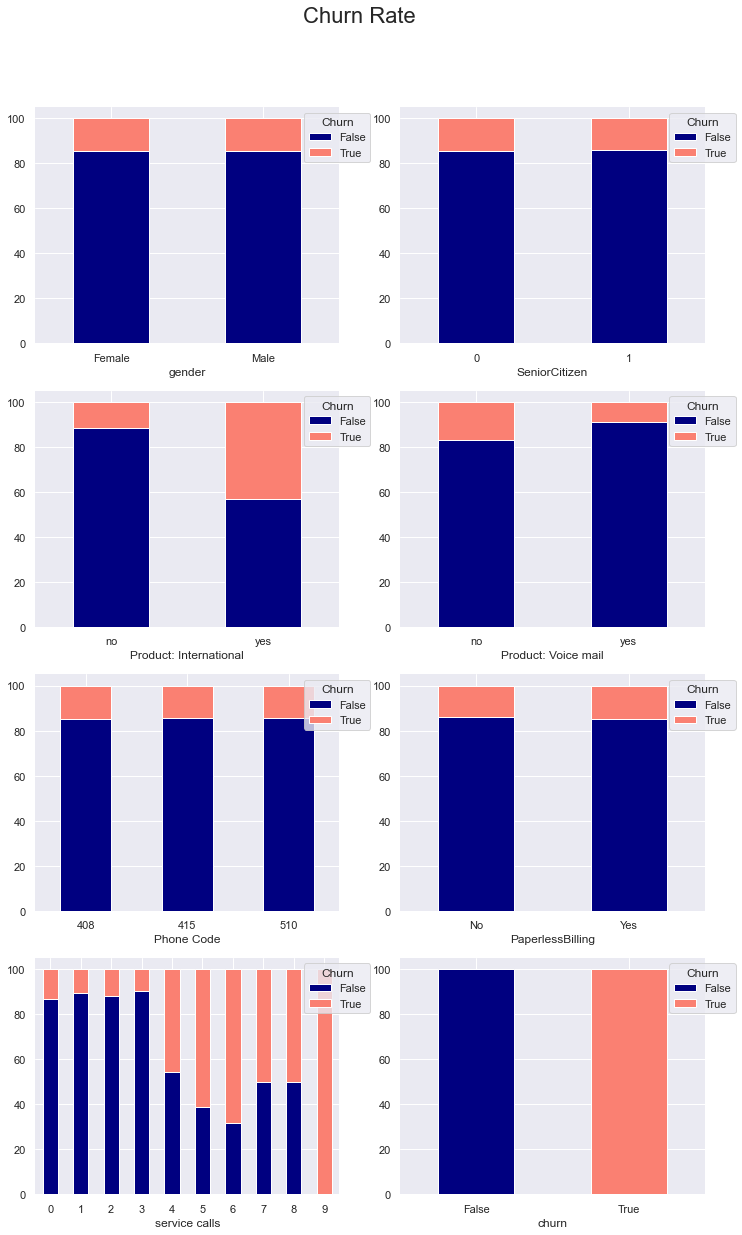

In [17]:
Per_Stacked_Bar_Plot_Cat_Feats(df_data, cat_feats, 'Churn Rate')

- 'Product International' , 'service calls' column shows interesting result

## Distribution trend for individual Categorical Feats

In [18]:
@interact( feature = cat_feats)
def Inter_Plot_Cat_Churn(feature):
    Plot_Cat_Col(df_data, feature,'churn')

interactive(children=(Dropdown(description='feature', options=('gender', 'SeniorCitizen', 'Product: Internatio…

## Churn Analysis wrt States

In [19]:
pd.crosstab(df_data['US State'], df_data['churn'])

churn,False,True
US State,,
AK,45,2
AL,64,7
AR,41,10
AZ,55,4
CA,20,8
CO,52,9
CT,58,11
DC,44,5
DE,44,9


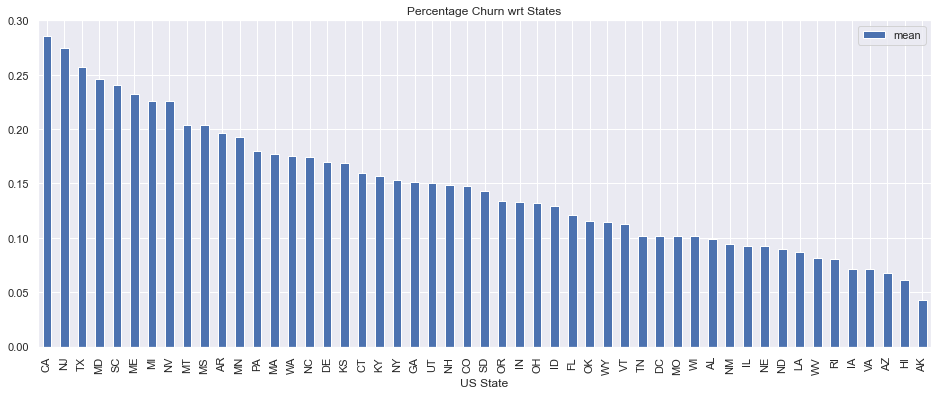

In [20]:
churn_state = df_data.groupby(['US State'])['churn'].agg([np.mean]).sort_values(by='mean', ascending=False)
churn_state.plot.bar(title = "Percentage Churn wrt States", figsize=(16,6))
plt.show()

## Facts Churn wrt States
- churn rate in New Jersey and California are above 25% and less than 6% for Hawaii and Alaska. 
- However small dataset is problem to get better insight

## Categorical Feat importance with Mutual_Information Score

In [21]:
def Compute_Mutual_Info(CAT_SERIES):
    return mutual_info_score(CAT_SERIES, df_data.churn)

categorical_variables = df_data[cat_feats].drop('churn', axis=1)
feature_importance = categorical_variables.apply(Compute_Mutual_Info).sort_values(ascending=False)
print(feature_importance)

service calls             0.035629
Product: International    0.026593
Product: Voice mail       0.005228
PaperlessBilling          0.000101
SeniorCitizen             0.000009
gender                    0.000003
Phone Code                0.000003
dtype: float64


## Prepare Data 
- Map Categorical Feats
- Scale numeric Feats

In [22]:
df_all_data = df_data[num_feats+cat_feats]
df_all_data = Convert_Cat_Feats(df_all_data)
df_all_data = Scale_Num_Feats_Train(df_all_data, num_feats)  # save max, min values in config file for pred use cases
df_all_data

,Duration,night calls,total day calls,international minutes,night minutes,Call day minutes,eve calls,vmail,international calls,eve minutes,gender,SeniorCitizen,Product: International,Product: Voice mail,Phone Code,PaperlessBilling,service calls,churn
85,0.524793,0.316901,0.630303,0.430,0.806347,0.511117,0.505882,0.568627,0.368421,0.621116,1,0,0,1,2,1,0,0
448,0.305785,0.345070,0.690909,0.610,0.227811,0.334379,0.358824,0.000000,0.157895,0.552928,1,0,0,0,1,1,1,0
272,0.198347,0.521127,0.472727,0.400,0.492200,0.611174,0.588235,0.549020,0.684211,0.646687,1,0,0,1,1,0,3,0
282,0.194215,0.330986,0.696970,0.610,0.325175,0.603478,0.494118,0.725490,0.052632,0.439648,0,0,0,1,1,0,1,0
1466,0.801653,0.464789,0.654545,0.255,0.432491,0.180160,0.517647,0.000000,0.157895,0.605444,1,0,0,0,1,1,0,0
223,0.140496,0.500000,0.684848,0.445,0.406401,0.425599,0.717647,0.000000,0.315789,0.665933,1,0,0,0,0,0,2,0
1687,0.367769,0.549296,0.484848,0.710,0.408284,0.107754,0.617647,0.000000,0.263158,0.427000,1,0,0,0,1,0,3,0
2410,0.367769,0.704225,0.618182,0.545,0.217321,0.313284,0.670588,0.000000,0.315789,0.607094,0,0,0,0,0,0,0,0
125,0.347107,0.514085,0.315152,0.600,0.616729,0.574116,0.611765,0.000000,0.157895,0.630740,1,0,0,0,0,1,1,0
680,0.475207,0.352113,0.545455,0.655,0.491124,0.540194,0.694118,0.000000,0.105263,0.521859,1,0,0,0,2,0,1,0


In [23]:
df_all_data.columns

Index(['Duration', 'night calls', 'total day calls', 'international minutes',
       'night minutes', 'Call day minutes', 'eve calls', 'vmail',
       'international calls', 'eve minutes', 'gender', 'SeniorCitizen',
       'Product: International', 'Product: Voice mail', 'Phone Code',
       'PaperlessBilling', 'service calls', 'churn'],
      dtype='object')

## Try Following Models to see performance

- 'dummy_classifier'
- 'k_nearest_neighbors'
- 'logistic_regression'
- 'support_vector_machines'
- 'random_forest'
- 'gradient_boosting'

In [24]:
X = df_all_data.drop(columns='churn')
y = df_all_data.loc[:, 'churn']
print(X.columns)
print(y.name)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=40, shuffle=True)

Index(['Duration', 'night calls', 'total day calls', 'international minutes',
       'night minutes', 'Call day minutes', 'eve calls', 'vmail',
       'international calls', 'eve minutes', 'gender', 'SeniorCitizen',
       'Product: International', 'Product: Voice mail', 'Phone Code',
       'PaperlessBilling', 'service calls'],
      dtype='object')
churn


In [25]:
models = create_models()

In [26]:
# test the accuracy of each model using default hyperparameters
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    model.fit(X_train, y_train).predict(X_test)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    results.append(accuracy)
    names.append(name)
    print('Classifier: {}, Accuracy: {})'.format(name, accuracy))

Classifier: dummy_classifier, Accuracy: 0.844)
Classifier: k_nearest_neighbors, Accuracy: 0.8613333333333333)
Classifier: logistic_regression, Accuracy: 0.8413333333333334)
Classifier: support_vector_machines, Accuracy: 0.856)
Classifier: random_forest, Accuracy: 0.94)
Classifier: gradient_boosting, Accuracy: 0.9493333333333334)


### RF and Gradient Boosting Model shows interesting results

## Default RF Model

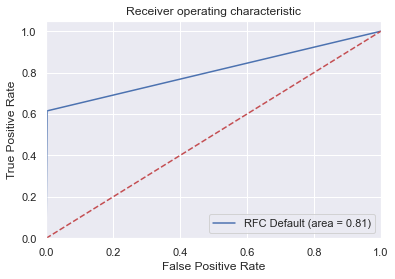

Area under curve is: 0.81
Recall for our model is: 0.62
Accuracy on test set is: 0.94
[[631   2]
 [ 45  72]]
              precision    recall  f1-score   support

           0       0.93      1.00      0.96       633
           1       0.97      0.62      0.75       117

    accuracy                           0.94       750
   macro avg       0.95      0.81      0.86       750
weighted avg       0.94      0.94      0.93       750



In [27]:
# Running the random forest with default parameters
rfc = RandomForestClassifier(class_weight = 'balanced',random_state=100,n_jobs = -1)
rfc.fit(X_train,y_train)
Get_ROC(rfc, X_test, y_test)

## Hyperparameter Tuning for RF Model 

## Tune individual Parameters of RF Model
- max_depth
- n_estimators
- min_samples_split
- min_samples_leaf
- max_features


Tuning max_depth
Fitting 5 folds for each of 23 candidates, totalling 115 fits
0.9485651746627356
{'max_depth': 22}


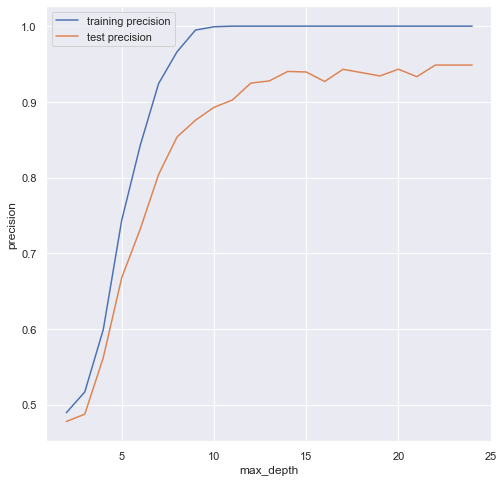


Tuning n_estimators
Fitting 5 folds for each of 5 candidates, totalling 25 fits
0.9485651746627356
{'n_estimators': 100}


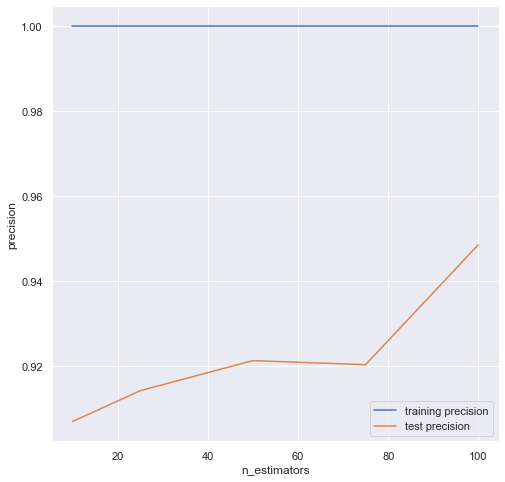


Tuning min_samples_split
Fitting 5 folds for each of 19 candidates, totalling 95 fits
0.8612256255961792
{'min_samples_split': 10}


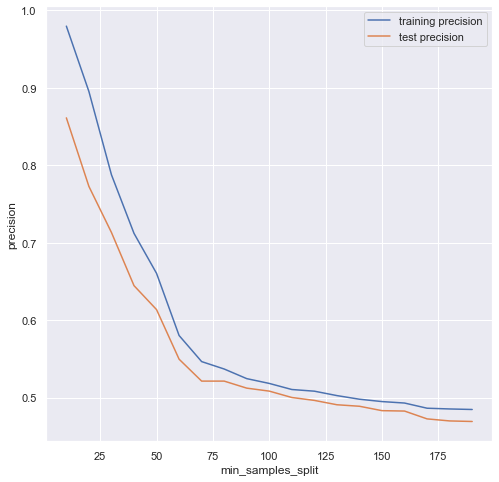


Tuning min_samples_leaf
Fitting 3 folds for each of 19 candidates, totalling 57 fits
0.645733543762741
{'min_samples_leaf': 10}


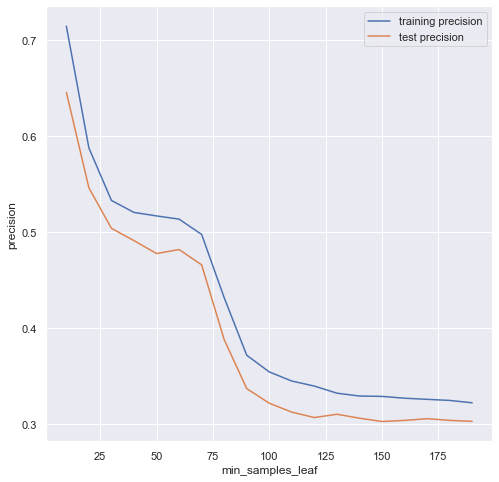


Tuning max_features
Fitting 3 folds for each of 4 candidates, totalling 12 fits
0.9254367551462622
{'max_features': 5}


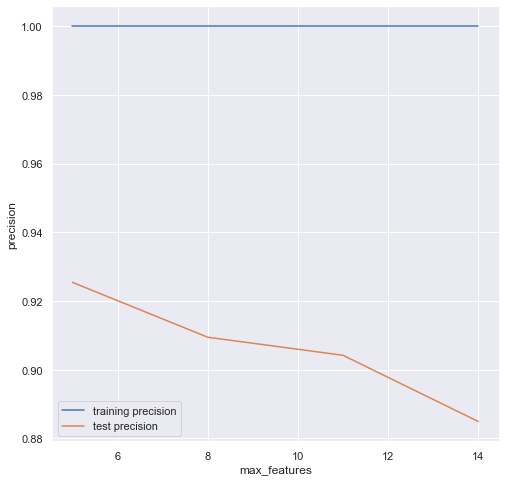

In [28]:
Tune_Single_Parameter(X_train, y_train, PAR_NAME= 'max_depth', 
                      PARAMETER={'max_depth': range(2, 25, 1)}, N_FOLD=5, TARGET="precision")
Tune_Single_Parameter(X_train, y_train, PAR_NAME= 'n_estimators', 
                      PARAMETER={'n_estimators': [10,25,50,75,100]}, N_FOLD=5, TARGET="precision")
Tune_Single_Parameter(X_train, y_train, PAR_NAME= 'min_samples_split', 
                      PARAMETER={'min_samples_split': range(10,200,10)}, N_FOLD=5, TARGET="precision")
Tune_Single_Parameter(X_train, y_train, PAR_NAME= 'min_samples_leaf', 
                      PARAMETER={'min_samples_leaf': range(10,200,10)}, N_FOLD=3, TARGET="precision")
Tune_Single_Parameter(X_train, y_train, PAR_NAME= 'max_features', 
                      PARAMETER={'max_features': range(5,16,3)}, N_FOLD=3, TARGET="precision")

## Find Best Hyper Parameters for RF Model

In [29]:
param_grid = {
    'max_depth': [10,13,15,17,20],
    'min_samples_split': [5,10,15], 
    'min_samples_leaf': [5,8,11,14,17] }

rf = RandomForestClassifier(class_weight = 'balanced',random_state=100)
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, #scoring='precision',
                          cv = 3, n_jobs = -1,verbose = 1,return_train_score=True)

grid_search.fit(X_train, y_train)
print(grid_search.best_score_)
print(grid_search.best_params_)
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

Fitting 3 folds for each of 75 candidates, totalling 225 fits
0.9364189289422935
{'max_depth': 15, 'min_samples_leaf': 5, 'min_samples_split': 15}
We can get accuracy of 0.9364189289422935 using {'max_depth': 15, 'min_samples_leaf': 5, 'min_samples_split': 15}


## Train RF Model With Best Parameters

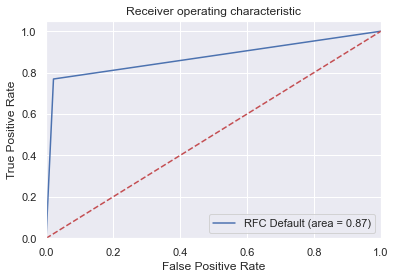

Area under curve is: 0.87
Recall for our model is: 0.77
Accuracy on test set is: 0.95
[[619  14]
 [ 27  90]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       633
           1       0.87      0.77      0.81       117

    accuracy                           0.95       750
   macro avg       0.91      0.87      0.89       750
weighted avg       0.94      0.95      0.94       750



In [30]:
rfc = RandomForestClassifier(bootstrap=True,random_state=100,
                             max_depth=grid_search.best_params_['max_depth'],
                             min_samples_split=grid_search.best_params_['min_samples_split'],
                              class_weight='balanced')
rfc.fit(X_train,y_train)
Get_ROC(rfc, X_test, y_test)

## Hyperparameter Tuning Increased
- Accuray increase
- AUC increase
- Recall increase

## RF Model Feat Importance

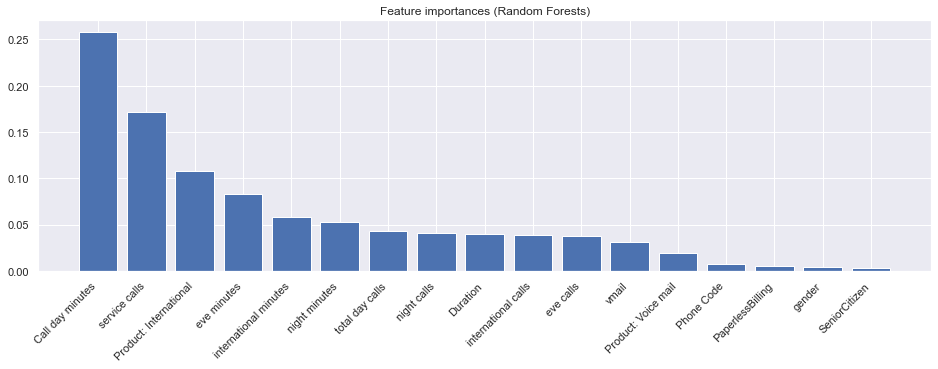

In [31]:
Get_RF_Model_Feat_Importance(rfc, X_train.columns, 17)

## Save Model as Pickle File

In [32]:
pickle.dump(rfc, open(f'model/RF_V001.pkl', 'wb'))

## Get Predictions for New Data Point

In [33]:
from get_pred import Main_Pred

In [34]:
Main_Pred('8022-BECSI')

df       customerID gender  SeniorCitizen US State  Duration  Phone Code  \
1994  8022-BECSI   Male              0       MD        84         510   

     Telephone Number Product: International Product: Voice mail  vmail  \
1994         369-2899                     no                  no      0   

      Call day minutes  total day calls  Total, EUR  eve minutes  eve calls  \
1994             169.5               96       28.82        157.6         94   

      eve EUR  night minutes  night calls  night EUR  international minutes  \
1994     13.4           98.2           70       4.42                   10.6   

      international calls  internatonal EUR  service calls PaperlessBilling  \
1994                    7              2.86              0               No   

      churn  
1994  False  
           ID  Per_Probability  ActualStatusChurn
0  8022-BECSI                6              False


,ID,Per_Probability,ActualStatusChurn
0,8022-BECSI,6,False
